<a href="https://colab.research.google.com/github/LucasVale98/Formacao_Data_Science/blob/main/Regress%C3%A3o_Linear_Testando_Rela%C3%A7%C3%B5es_e_Prevendo_Resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01. Analise Preliminare**

**Conhecendo o dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/datasets/alura_curssos/Regressao Linear: Testando Relacoes e Prevendo Resultados'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_csv(path + '/Consumo_cerveja.csv', sep=';')

# **O Dataset e o Projeto**

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

In [ ]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [ ]:
dados.shape

(365, 7)

**Análises preliminares**

In [ ]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [ ]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


# **02. Comportamento de variável dependentes**

**Comportamento da variável dependente**

In [ ]:
x, y = (28,11)

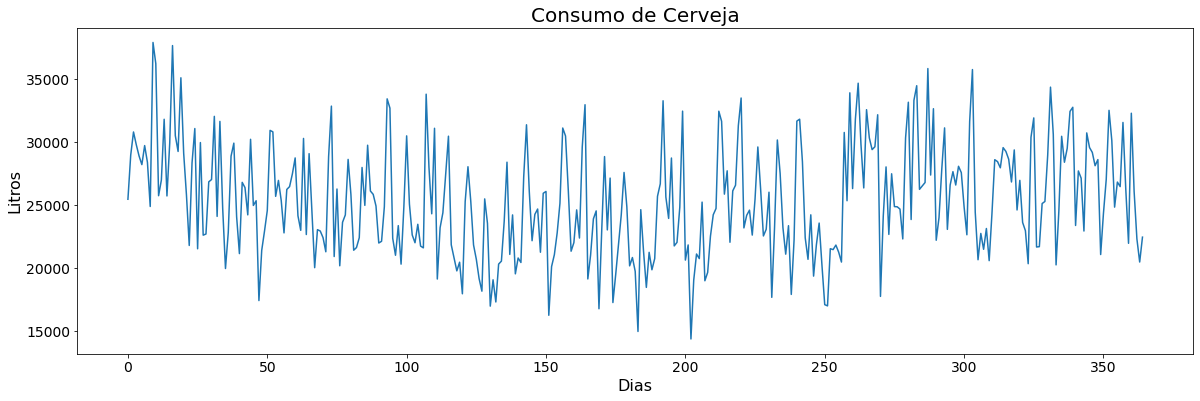

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6)) 

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

**Usando Box plot**

In [ ]:
import seaborn as sns

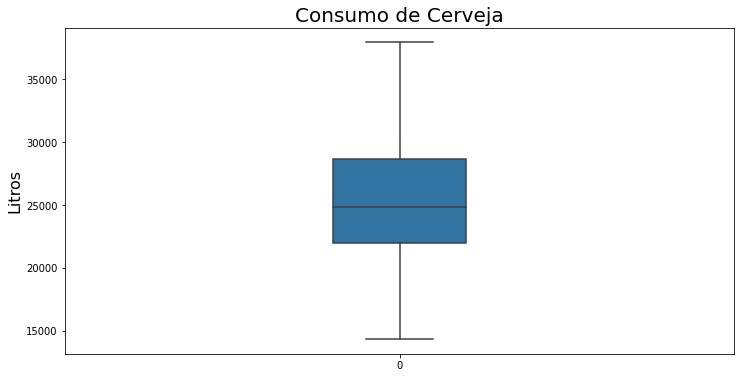

In [ ]:
ax = sns.boxplot(data=dados["consumo"], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax

**Box plot com duas variáveis**

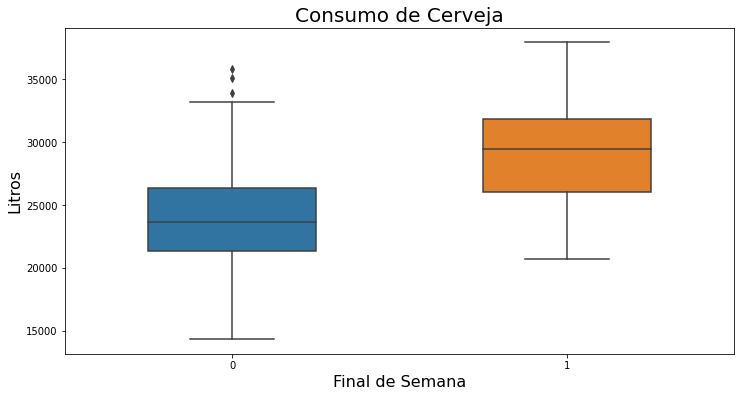

In [ ]:
ax = sns.boxplot(y = "consumo", x ="fds", data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

**Distribuição de frequências**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


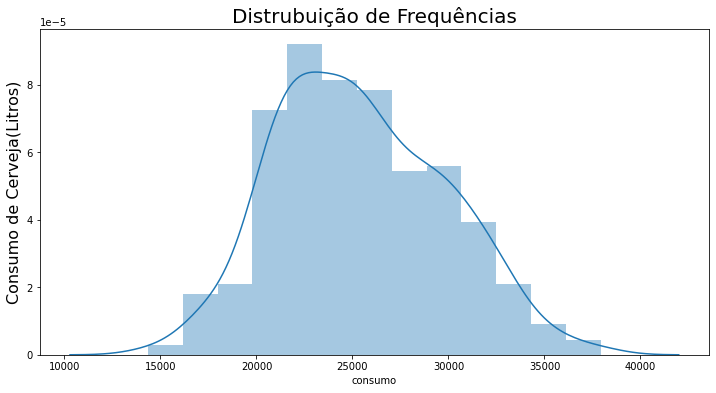

In [ ]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja(Litros)', fontsize=16)
ax

# **03. Variáveis dependentes vs Variáveis explicativas**

**Pairplot**

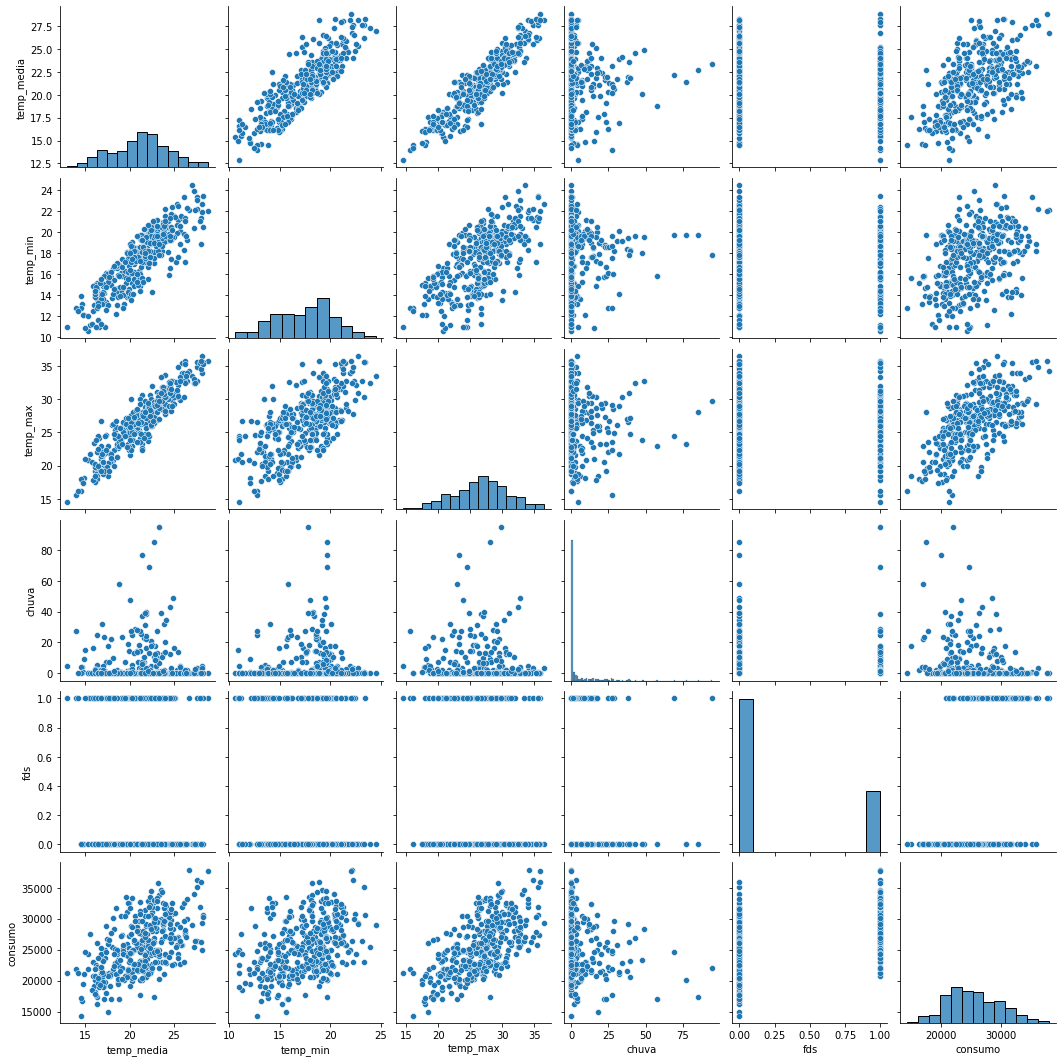

In [ ]:
ax = sns.pairplot(dados)

Text(0.5, 1.1, 'Dispersão entre as Variáveis')

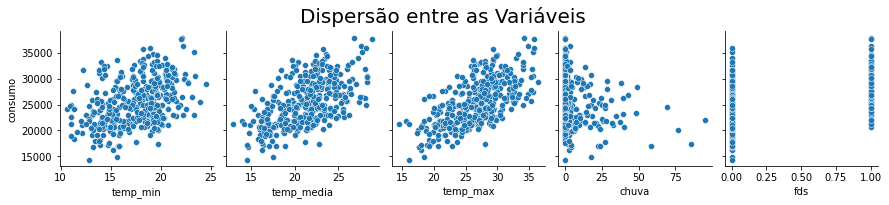

In [ ]:
ax = sns.pairplot(dados, y_vars="consumo", x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle("Dispersão entre as Variáveis", fontsize=20, y=1.10 )

Text(0.5, 1.1, 'Dispersão entre as Variáveis')

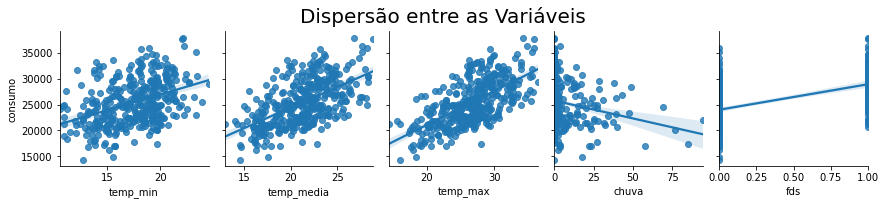

In [ ]:
ax = sns.pairplot(dados, y_vars="consumo", x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind="reg")
ax.fig.suptitle("Dispersão entre as Variáveis", fontsize=20, y=1.10 )

**Jointplot**

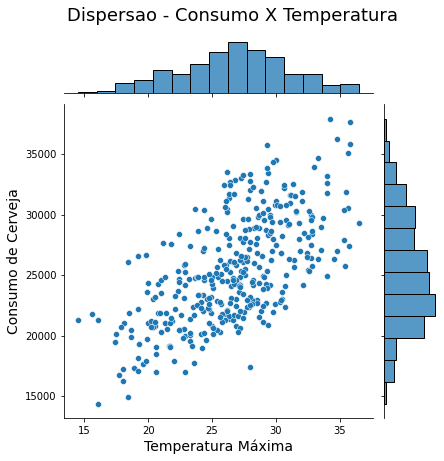

In [ ]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

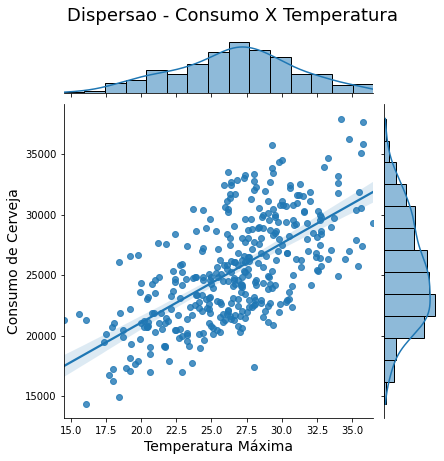

In [ ]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados, kind="reg")
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

**Lmplot**

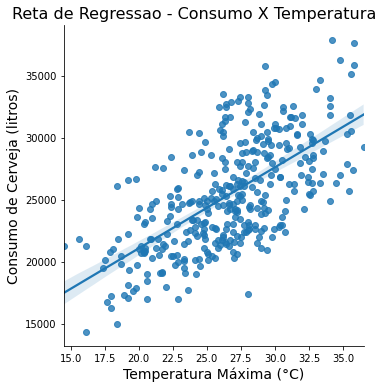

In [ ]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

# **04. Datassets de treino e teste**

**Datasets de treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = dados["consumo"]

In [ ]:
X = dados[["temp_max", "chuva", "fds"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.3, random_state=2811)

In [ ]:
X_train.shape

(255, 3)

In [ ]:
X_test.shape

(110, 3)

**Estimando um modelo de regressão linear**

In [ ]:
from sklearn.linear_model import  LinearRegression
from sklearn import metrics

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


In [ ]:
y_previsto = modelo.predict(X_test)

In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


**Obtendo previsões pontuais**

In [ ]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [ ]:
modelo.predict(entrada)[0]

26094.901775262017

In [ ]:
temp_max = 40
chuva = 0
fds = 1
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


**Interpretação dos coeficientes estimados**

**Intercepto:** representa o efeito médio em Y, excluindo os efeitos das outras variáveis do modelo. Obtemos esse resultado ao escrever modelo.intercept_. O tipo desse coeficiente é o numpy.float, e posteriormente aprenderemos a realizar uma apresentação mais eficiente utilizando esse dado.

In [ ]:
modelo.intercept_

5951.976339312445

**Coeficientes de regressão:** também conhecidos por "coeficientes parciais de regressão" ou "coeficientes parciais angulares". É obtido por meio do valor médio de Y, com a variação de uma unidade de uma determinada variável X. No caso do nosso projeto, poderíamos utilizar temp_max, por exemplo. A ideia é estudar o efeito direto de uma varíavel em cima de Y.

In [ ]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [ ]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [ ]:
index=["Intercepto", "Temperatura Máxima", "Chva (mm)", "Final de Semana"]

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=["Parâmetros"])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chva (mm),-60.782435
Final de Semana,5401.083339


**Análises gráficas das previsões**

In [ ]:
y_previsto_train = modelo.predict(X_train)

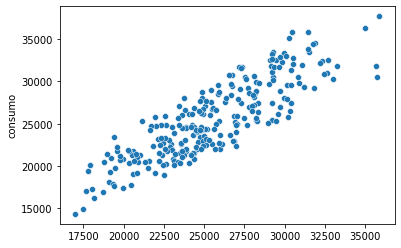

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)

In [ ]:
residuo = y_train - y_previsto_train

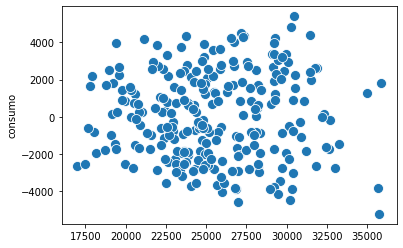

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=100)

# **05. Comparando Modelos**

**Comparando modelos**

In [ ]:
X2 = dados[['temp_media', 'chuva', 'fds']]

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split( 
    X2, y, test_size=0.3, random_state=2811)

In [ ]:
modelo_2 = LinearRegression()

In [ ]:
modelo_2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Modelo com Tem. Média')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Tem. Média
R² = 0.66


In [ ]:
print('Modelo com Tem. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Tem. Máxima
R² = 0.73


In [ ]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

In [ ]:
print('Modelo com Tem. Média')
print('R² = {}'.format(metrics.r2_score(y2_test, y_previsto_2).round(2)))

Modelo com Tem. Média
R² = 0.66


In [ ]:
print('Modelo com Tem. Maxima')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com Tem. Maxima
R² = 0.69


**Outras métricas de regressão**

In [ ]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


In [ ]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.66


**06. Salvando e carregando modelo**

**Utilizando Pickle**

In [ ]:
X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [ ]:
entrada = X_test[0:1]

In [ ]:
modelo.predict(entrada)[0]

26094.901775262017

In [ ]:
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]

print('{0:.2f} Litros'.format(modelo.predict(entrada)[0]))

26094.90 Litros


In [ ]:
import pickle

In [ ]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()